In [57]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

from seaborn import pairplot 
from seaborn import boxplot
from seaborn import countplot
import matplotlib.pyplot as plt
import numpy as np
import math

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score

plt.style.use('belle2')


# Define Logistic regression class

In [58]:
def logistic_fun(X,y,theta, MSE = False):
    n = X.shape[0]

    X =np.column_stack([np.ones((n,1)),X])
    xth_y = (X.dot(theta))

    htheta = (1+ math.e**(-xth_y))**(-1)
    cost = -1/n * (np.log(htheta)*y+(1-y)*np.log(1-htheta)).sum()

    return htheta, cost



In [84]:

class Logistic_regression: 
    def __init__(self, learning_rate=0.01, iterations=1000, MSE = False, lambd = 0.1, penalty = 'l2',\
                 saturationplot=False):
        self.learning_rate, self.iterations, self.MSE, self.lambd, self.penalty, self.saturationplot = \
        learning_rate, iterations, MSE, lambd, penalty, saturationplot
        

    def logistic_fun(self,X,y,theta):
        n = X.shape[0]
        X =np.column_stack([np.ones((n,1)),X])
        xth_y = (X.dot(theta))

        htheta = (1+ math.e**(-xth_y))**(-1)

        if self.penalty == 'l2':
            # theta0 not taken in regulariation
            thetal2 = theta.copy()
            thetal2[0] = 0
            cost = -1/n * (np.log(htheta)*y+(1-y)*np.log(1-htheta)).sum() +\
                                   self.lambd/(n)* np.absolute(thetal2).sum()
            vfuncsgn = np.vectorize(self.sgn)
            grad =    1/n *( (htheta-y).dot(X) + self.lambd * vfuncsgn(thetal2) )
            del thetal2
        elif self.penalty == 'l1':
            # theta0 not taken in regulariation
            thetal1 = theta.copy()
            thetal1[0] = 0
            cost = -1/n * (np.log(htheta)*y+(1-y)*np.log(1-htheta)).sum() +\
                             self.lambd/(2*n)* (thetal1**2).sum()
            grad =    1/n *( (htheta-y).dot(X) + 2 * self.lambd * thetal1 )
            del thetal1
        elif self.penalty == 'none':                    
            cost = -1/n * (np.log(htheta)*y+(1-y)*np.log(1-htheta)).sum()
            grad =    1/n *( (htheta-y).dot(X) )
        
        return htheta, cost, grad

    def fit(self, X, y):
        theta = np.full((X.shape[1]+1,),0.01)
        costlist = []
        nitlist = []
        
        for nit in range(self.iterations):
            htheta, cost, grad = self.logistic_fun(X, y, theta)
            theta = theta - self.learning_rate * grad 
            
            if nit % 10 == 0:
                nitlist.append(nit)
                costlist.append(cost)
        if self.saturationplot :
            plt.plot(np.array(nitlist),np.array(costlist),marker='o')
            plt.xlabel('number of iteration')
            plt.ylabel('Cost')
            plt.show()

        self.theta = theta
        
    def sgn(self, x):
        if x > 0:
            return 1
        elif x < 0:
            return -1
        elif x == 0:
            return 0



    def predict(self, X, continuous= False):
        n = X.shape[0]
        
        X =np.column_stack([np.ones((n,1)),X])
        xth_y = (X.dot(self.theta))
        htheta = (1+ math.e**(-xth_y))**(-1)
        
        if not continuous:
            htheta[htheta > 0.5] = 1
            htheta[htheta <= 0.5] = 0


        
        return htheta
    
    

# Credit card dataset
 Here https://r-data.pmagunia.com/dataset/r-dataset-package-islr-default
 
 On this R-data statistics page, you will find information about the Default data set which pertains to Credit Card Default Data. The Default data set is found in the ISLR R package. You can load the Default data set in R by issuing the following command at the console data("Default"). This will load the data into a variable called Default. If R says the Default data set is not found, you can try installing the package by issuing this command install.packages("ISLR") and then attempt to reload the data. If you need to download R, you can go to the R project website. You can download a CSV (comma separated values) version of the Default R data set. The size of this file is about 433,674 bytes.

In [60]:
df = pd.read_csv('dataset-63314.csv')
# creating number target variable
codes = {'Yes':0,'No':1}
df['target'] = df['default'].map(codes)
df['isstudent'] = df['student'].map(codes)
df.head(5)

,default,student,balance,income,target,isstudent
0,No,No,729.526495,44361.625074,1,1
1,No,Yes,817.180407,12106.134700,1,0
2,No,No,1073.549164,31767.138947,1,1
3,No,No,529.250605,35704.493935,1,1
4,No,No,785.655883,38463.495879,1,1


In [61]:
df = df.drop(columns=['default','student']).copy()


x = df[['balance','income','isstudent']].copy()
y  = df['target'].to_numpy()

scaler = StandardScaler()
scaler.fit(x)

x = pd.DataFrame(scaler.transform(x))
dfprime = pd.concat([df,x],axis=1)

## Fit with logistic refgression

### train test split

In [62]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15, random_state=42)

In [63]:
clf = Logistic_regression( learning_rate=0.1, iterations=1000,penalty='none')
clf.fit(x_train, y_train)
clf.theta

array([ 4.07596033, -1.49872991, -0.0773642 , -0.05041211])

In [64]:

clf = Logistic_regression( learning_rate=0.1, iterations=1000, penalty='l1', lambd=0.1)
clf.fit(x_train, y_train)
clf.theta

array([ 4.07205006, -1.49648449, -0.07723319, -0.05031381])

In [65]:

clf = Logistic_regression( learning_rate=0.1, iterations=1000, penalty='l2', lambd=0.1)
clf.fit(x_train, y_train)
clf.theta

array([ 4.07525242, -1.49818831, -0.07705332, -0.05031721])

## accuracy

In [66]:
y_pred = clf.predict(x_train)
y_pred[y_pred > 0.5] = 1
y_pred[y_pred <= 0.5] = 0
accuracy_score(y_train, y_pred)

0.9703529411764706

In [67]:
y_pred = clf.predict(x_test)
y_pred[y_pred > 0.5] = 1
y_pred[y_pred <= 0.5] = 0
accuracy_score(y_test, y_pred)

0.9633333333333334

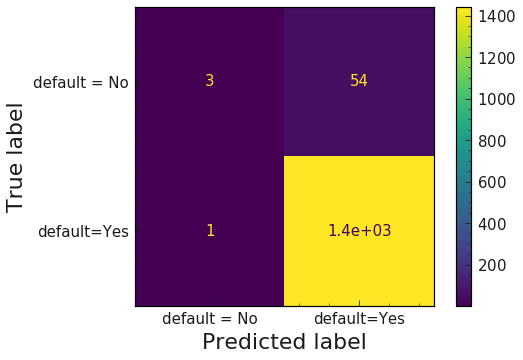

In [68]:
confusion_matrix(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
        
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['default = No','default=Yes'])
disp.plot()
plt.show()

In [69]:
clf.theta

array([ 4.07525242, -1.49818831, -0.07705332, -0.05031721])

## confusion matrix at differnt threshold

In [70]:
from sklearn.preprocessing import binarize
y_pred = clf.predict(x_test,continuous=True)

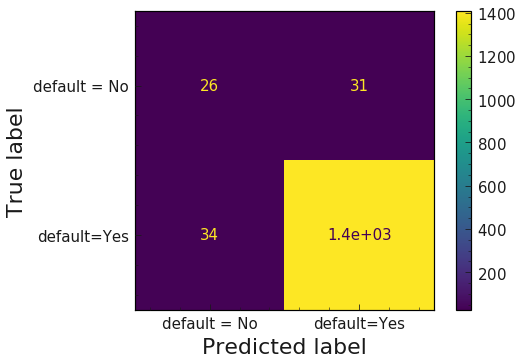

In [71]:
## threshold = 0.8
y_pred2 = binarize(y_pred.reshape(1500,1),0.8).reshape(1500,)
cm = confusion_matrix(y_test, y_pred2)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['default = No','default=Yes'])
disp.plot()
plt.show()

# roc

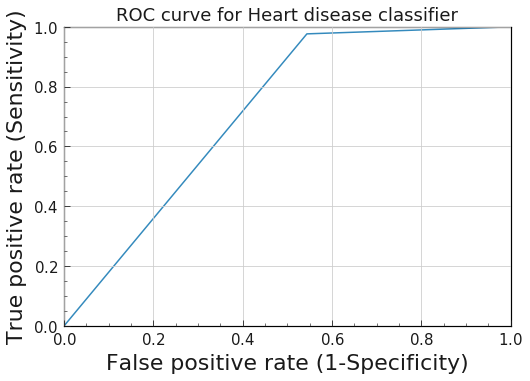

In [72]:
from sklearn.metrics import roc_curve

y_pred2 = binarize(y_pred.reshape(1500,1),0.8).reshape(1500,)
fpr, tpr, thresholds = roc_curve(y_test, y_pred2)
plt.plot(fpr,tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for Heart disease classifier')
plt.xlabel('False positive rate (1-Specificity)')
plt.ylabel('True positive rate (Sensitivity)')
plt.grid(True)


# other dataset

In [73]:

#%% import dataset 
data = pd.read_csv("data.csv")
data.drop(['Unnamed: 32',"id"], axis=1, inplace=True)
data.diagnosis = [1 if each == "M" else 0 for each in data.diagnosis]
y = data.diagnosis.values
x_data = data.drop(['diagnosis'], axis=1)

# adding a arbitary variable to check effect of regularization
blah1 = np.random.rand(569,)
blah2 = np.random.rand(569,)
blah3 = np.random.rand(569,)

x_data.loc[:,'blah1'] = blah1
x_data.loc[:,'blah2'] = blah2
x_data.loc[:,'blah3'] = blah3


# %% normalization
x = (x_data -np.min(x_data))/(np.max(x_data)-np.min(x_data)).values

## No penalty

In [74]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15, random_state=42)
clf = Logistic_regression( learning_rate=0.1, iterations=1000, penalty='none')
clf.fit(x_train, y_train)
print('theta',clf.theta)


y_pred = clf.predict(x_train,continuous=False)
print('train score',accuracy_score(y_train, y_pred))

y_pred = clf.predict(x_test,continuous=False)
print('test score',accuracy_score(y_test, y_pred))


theta [-3.31636226  0.82781355  0.39335459  0.8841457   0.96200742 -0.29871844
  0.65658482  1.39644591  1.75122924 -0.2144233  -0.90762338  0.68195209
 -0.41300703  0.5746818   0.57280416 -0.4984919  -0.14610747 -0.11446811
 -0.04406052 -0.44751534 -0.3379342   1.28432684  0.69353002  1.2411489
  1.14453026  0.24978897  0.83535006  1.1200335   1.81107628  0.43081841
  0.14723146 -0.36039131 -0.68059359 -0.92002364]
train score 0.9358178053830227
test score 0.9651162790697675


## Lasso regression

In [88]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15, random_state=42)
clf = Logistic_regression( learning_rate=0.1, iterations=1000, penalty='l2', lambd=1)
clf.fit(x_train, y_train)

print('theta',clf.theta)


y_pred = clf.predict(x_train,continuous=False)
print('train score',accuracy_score(y_train, y_pred))

y_pred = clf.predict(x_test,continuous=False)
print('test score',accuracy_score(y_test, y_pred))


theta [-3.32680126e+00  7.49488617e-01  2.59469925e-01  8.06392088e-01
  8.63945969e-01 -8.43720198e-02  5.18571103e-01  1.28379632e+00
  1.66615020e+00 -1.96239800e-03 -7.48126517e-01  5.14780399e-01
 -2.37157147e-01  4.05829730e-01  4.03628541e-01 -3.34344154e-01
 -2.96226664e-02 -3.42553246e-04 -2.98367180e-04 -2.79721723e-01
 -1.57269630e-01  1.21849704e+00  5.73106575e-01  1.17154718e+00
  1.04386023e+00  1.09742700e-01  7.18088874e-01  1.01400723e+00
  1.77139114e+00  2.66176707e-01 -3.43094332e-05 -2.34536377e-01
 -5.33369705e-01 -8.01009624e-01]
train score 0.9358178053830227
test score 0.9651162790697675


<div class="girk">
<span class="burk">Look at the coefficient value for lasso regularization, they got lower value.</span></div><i class="fa fa-lightbulb-o "></i>

## Ridge regression

In [76]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15, random_state=42)
clf = Logistic_regression( learning_rate=0.1, iterations=1000, penalty='l1', lambd=1)
clf.fit(x_train, y_train)
print('theta',clf.theta)

y_pred = clf.predict(x_train,continuous=False)
print('train score',accuracy_score(y_train, y_pred))

y_pred = clf.predict(x_test,continuous=False)
print('test score',accuracy_score(y_test, y_pred))


theta [-2.79999844  0.70028715  0.31869558  0.74833337  0.8116477  -0.25583343
  0.56312858  1.1851727   1.48024598 -0.18294958 -0.76225195  0.57001443
 -0.35518361  0.48106903  0.47881014 -0.42540864 -0.11228886 -0.09115553
 -0.03158932 -0.3797387  -0.27955653  1.08239442  0.56729966  1.04723666
  0.96315097  0.20289598  0.71249188  0.95271847  1.53403581  0.3568423
  0.12694149 -0.33242448 -0.59530309 -0.8083301 ]
train score 0.9337474120082816
test score 0.9651162790697675


## cross validation to find $\lambda$

In [95]:
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
score1 = []
score2 = []
kf = KFold(n_splits=10,shuffle=True)

print('lambda   ','train score    ','test score')
for lambd in [0.0001,0.0005,0.001, 0.01,0.1]:
    for train_index, test_index in kf.split(range(150)):

        X_train = np.take(x,train_index,axis=0)
        X_test = np.take(x,test_index,axis=0)
        y_train = np.take(y,train_index,axis=0)
        y_test = np.take(y,test_index,axis=0)

        mod_dt = clf = Logistic_regression( learning_rate=0.1, iterations=1000, penalty='none', lambd=lambd)#KNeighborsClassifier(n_neighbors=2)
        mod_dt.fit(X_train,y_train)

        prediction=mod_dt.predict(X_test,continuous = False)
        score_test = metrics.accuracy_score(prediction,y_test)
        #print('The accuracy of the Decision Tree is',"{:.3f}".format(score_test))

        prediction=mod_dt.predict(X_train,continuous = False)
        score_train = metrics.accuracy_score(prediction,y_train)
        #print('The training data score is ',"{:.3f} \n".format(score_train))

        score1.append(score_train)
        score2.append(score_test)
    
    print(lambd,np.array(score1).mean(),np.array(score2).mean())


lambda    train score     test score
0.0001 0.9348148148148148 0.9066666666666668
0.0005 0.9337037037037037 0.9133333333333334
0.001 0.934567901234568 0.9133333333333334
0.01 0.9338888888888889 0.9116666666666667
0.1 0.9340740740740741 0.912


 L1 regularization

lambda | train score | test score
-------|----------------------|-----------------
0.0001 |0.9340740740740742 |0.9199999999999999
0.0005 |0.9337037037037037 |0.9200000000000002
0.001 |0.9330864197530866 |0.9177777777777778
0.01 |0.9333333333333333 |0.9133333333333333
0.1 |0.9334814814814816| 0.9133333333333333


L2 regularization

lambda | train score | test score
-------|----------------------|-----------------
0.0001 | 0.9340740740740741 | 0.9200000000000002
0.0005| 0.9362962962962962 |0.9200000000000002
0.001| 0.9355555555555557 |0.9222222222222223
0.01| 0.9351851851851851 |0.9199999999999999
0.1 |0.9348148148148147 |0.9186666666666666


no regularization

lambda | train score | test score
-------|----------------------|-----------------
0.0001 |0.9348148148148148 |0.9066666666666668
0.0005| 0.9337037037037037| 0.9133333333333334
0.001 |0.934567901234568 |0.9133333333333334
0.01 |0.9338888888888889| 0.9116666666666667
0.1 |0.9340740740740741 |0.912
